In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

### **1.Data Preprocessing:**

1.Load the CIFAR-10 dataset..

2.Perform necessary data preprocessing steps:

3.Normalize pixel values to range between 0 and 1.

4.Convert class labels into one-hot encoded format.

5.Split the dataset into training and test sets (e.g., 50,000 images for
training and 10,000 for testing).

6.Optionally, apply data augmentation techniques (such as random
flips, rotations, or shifts) to improve the generalization of the
model.

In [ ]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert class labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Check the shape of the data
print("Training data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step
Training data shape:  (50000, 32, 32, 3)
Test data shape:  (10000, 32, 32, 3)


In [ ]:
# Define data augmentation generator
datagen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Fit the generator to training data
datagen.fit(X_train)


### **2.Network Architecture Design:**
1.Design a feedforward neural network to classify the images.

▪ Input Layer: The input shape should match the 32x32x3
dimensions of the CIFAR-10 images.

▪ Hidden Layers: Use appropriate layers.

▪ Output Layer: The final layer should have 10 output neurons (one
for each class) with a softmax activation function for multi-class
classification.

In [ ]:
# Build a simple feedforward convolutional neural network
model = Sequential()

# First Conv2D layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Conv2D layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Fully connected Dense layer
model.add(Dense(128, activation='relu'))

# Output layer with softmax activation
model.add(Dense(10, activation='softmax'))

# Summary of the model
model.summary()

def create_model():
    model = Sequential()
    # Input Layer + First Conv2D Layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Conv2D Layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Fully connected Dense layer
    model.add(Dense(128, activation='relu'))



    # Output layer with softmax activation
    model.add(Dense(10, activation='softmax'))

    return model

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

### **Justify your network architecture.**

Convolutional layers: Convolution layers with 32 and 64 filters are commonly used in CNNs to extract features such as edges, textures, and objects from images. The filter size (3x3) is optimal for detecting small features.

MaxPooling: Helps reduce spatial dimensions and overfitting by retaining important information.

Dense Layer: The fully connected layer with 128 neurons is responsible for learning non-linear combinations of the extracted features to classify the images.

Softmax output: For multi-class classification, softmax activation ensures the output is a probability distribution over 10 classes

### **Explain why you selected a particular activation function and its role in the backpropagation process.**

ReLU Activation Function:

Selection Reason: ReLU is computationally efficient and helps mitigate the vanishing gradient problem, allowing for faster and more effective training.

Role in Backpropagation: ReLU provides non-zero gradients for positive inputs, ensuring that neurons remain active during training. This facilitates the flow of gradients back through the network, allowing for efficient weight updates.

Softmax Activation Function:

Selection Reason: Softmax is ideal for multi-class classification as it converts raw model outputs into probabilities that sum to one.

Role in Backpropagation: The softmax function, coupled with the categorical cross-entropy loss, provides meaningful gradients that guide the optimizer in adjusting weights to minimize the loss.

In [ ]:
def compile_and_train_model(loss_function, epochs=10):
    model = create_model()
    model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_function, metrics=['accuracy'])

    # Train the model using data augmentation
    history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                        epochs=epochs, validation_data=(X_test, y_test), verbose=2)

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test Accuracy with {loss_function}: {test_acc:.4f}")

    return model, history, test_acc  # Return the trained model as well


Training with Categorical Cross-Entropy Loss:
Epoch 1/10


c:\Users\Likitha Yadav G\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
c:\Users\Likitha Yadav G\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 - 22s - 28ms/step - accuracy: 0.4268 - loss: 1.5865 - val_accuracy: 0.5262 - val_loss: 1.3261
Epoch 2/10
782/782 - 22s - 28ms/step - accuracy: 0.5424 - loss: 1.2872 - val_accuracy: 0.6101 - val_loss: 1.0923
Epoch 3/10
782/782 - 22s - 28ms/step - accuracy: 0.5902 - loss: 1.1657 - val_accuracy: 0.6336 - val_loss: 1.0467
Epoch 4/10
782/782 - 21s - 27ms/step - accuracy: 0.6198 - loss: 1.0836 - val_accuracy: 0.6672 - val_loss: 0.9545
Epoch 5/10
782/782 - 20s - 25ms/step - accuracy: 0.6416 - loss: 1.0261 - val_accuracy: 0.6807 - val_loss: 0.9389
Epoch 6/10
782/782 - 19s - 25ms/step - accuracy: 0.6573 - loss: 0.9847 - val_accuracy: 0.6852 - val_loss: 0.9262
Epoch 7/10
782/782 - 19s - 25ms/step - accuracy: 0.6694 - loss: 0.9512 - val_accuracy: 0.7003 - val_loss: 0.8696
Epoch 8/10
782/782 - 19s - 25ms/step - accuracy: 0.6841 - loss: 0.9119 - val_accuracy: 0.6961 - val_loss: 0.8824
Epoch 9/10
782/782 - 19s - 24ms/step - accuracy: 0.6921 - loss: 0.8853 - val_accuracy: 0.7039 - val_loss: 0

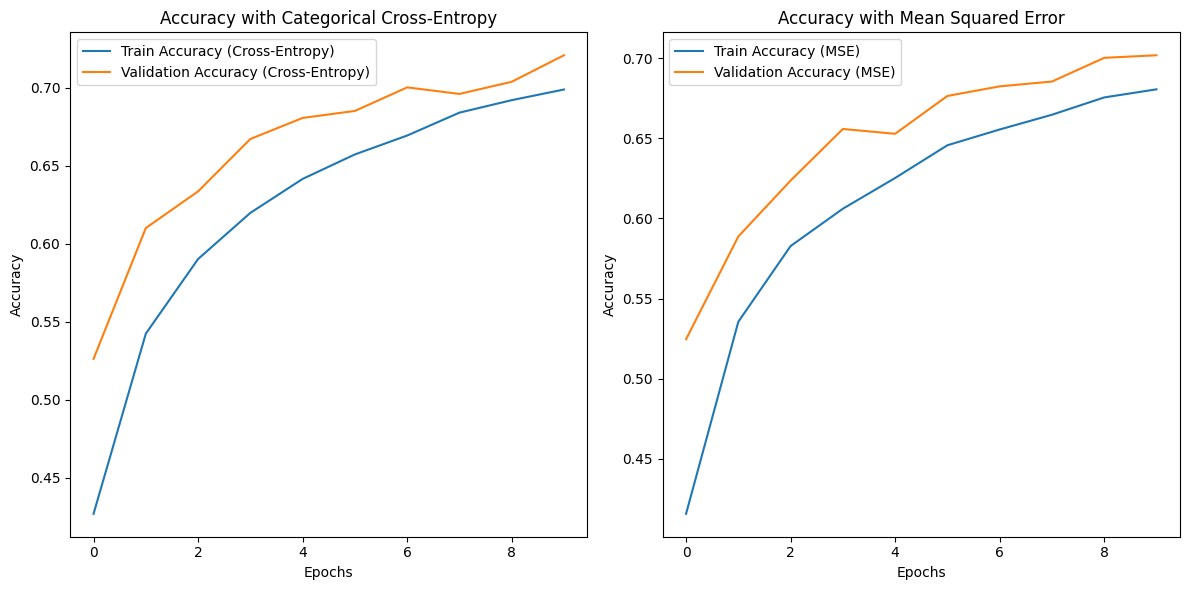

In [ ]:
# Training with Categorical Cross-Entropy
print("Training with Categorical Cross-Entropy Loss:")
model_crossentropy, history_crossentropy, test_acc_crossentropy = compile_and_train_model('categorical_crossentropy', epochs=10)

# Training with Mean Squared Error
print("\nTraining with Mean Squared Error Loss:")
model_mse, history_mse, test_acc_mse = compile_and_train_model(MeanSquaredError(), epochs=10)


# Plot training & validation accuracy comparison
plt.figure(figsize=(12, 6))

# Cross-Entropy Loss
plt.subplot(1, 2, 1)
plt.plot(history_crossentropy.history['accuracy'], label='Train Accuracy (Cross-Entropy)')
plt.plot(history_crossentropy.history['val_accuracy'], label='Validation Accuracy (Cross-Entropy)')
plt.title('Accuracy with Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Mean Squared Error Loss
plt.subplot(1, 2, 2)
plt.plot(history_mse.history['accuracy'], label='Train Accuracy (MSE)')
plt.plot(history_mse.history['val_accuracy'], label='Validation Accuracy (MSE)')
plt.title('Accuracy with Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Performance Comparison of using both the loss functions

Training and Validation Accuracy:

Cross-Entropy:

Final Training Accuracy: 69.89%

Final Validation Accuracy: 72.09%

Mean Squared Error:

Final Training Accuracy: 68.05%

Final Validation Accuracy: 70.18%

Test Accuracy:

Cross-Entropy: 72.09%

Mean Squared Error: 70.32%

### How does backpropagation update the weights in each layer, and what role does the learning rate play in this process?
backpropagation updates the weights in each layer by calculating gradients of the loss function and applying the learning rate to determine the step size of the weight updates. The choice of learning rate is crucial for the training process, impacting both convergence speed and stability. A balance must be struck to achieve efficient learning without overshooting optimal solutions.

In [ ]:
y_pred_crossentropy = model.predict(X_test)
y_pred_classes_crossentropy = np.argmax(y_pred_crossentropy, axis=1)
y_true_crossentropy = np.argmax(y_test, axis=1)

y_pred_mse = model.predict(X_test)
y_pred_classes_mse = np.argmax(y_pred_mse, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
accuracies = {
    'Categorical Cross-Entropy': test_acc_crossentropy,
    'Mean Squared Error': test_acc_mse
}

print("\nSummary of Test Accuracies:")
for loss_type, accuracy in accuracies.items():
    print(f"{loss_type}: {accuracy:.4f}")


Summary of Test Accuracies:
Categorical Cross-Entropy: 0.7209
Mean Squared Error: 0.7018


### How can you further improve model performance if the accuracy is low?

1. **Data Augmentation**: Enhance your training dataset by creating modified versions of the images (like rotating or flipping) to provide more diverse examples for the model.

2. **Hyperparameter Tuning**: Experiment with settings like learning rate, batch size, and the number of epochs to find the best configuration for your model.

3. **Regularization Techniques**: Apply methods like dropout and L1/L2 regularization to prevent overfitting and help the model generalize better.

4. **Change Model Architecture**: Try adding more layers or using different types of layers to enable the model to learn more complex features.

5. **Use Transfer Learning**: Leverage a pre-trained model and fine-tune it for your specific task, especially if your dataset is small, to boost accuracy.

In [ ]:
# Confusion Matrix
conf_matrix_crossentropy = confusion_matrix(y_true_crossentropy, y_pred_classes_crossentropy)
conf_matrix_mse = confusion_matrix(y_true_crossentropy, y_pred_classes_mse)

print("Confusion Matrix with Categorical Cross-Entropy:\n", conf_matrix_crossentropy)
print("Confusion Matrix with Mean Squared Error:\n", conf_matrix_mse)

# Classification Report
class_report_crossentropy = classification_report(y_true_crossentropy, y_pred_classes_crossentropy)
class_report_mse = classification_report(y_true_crossentropy, y_pred_classes_mse)

print("Classification Report with Categorical Cross-Entropy:\n", class_report_crossentropy)
print("Classification Report with Mean Squared Error:\n", class_report_mse)

Confusion Matrix with Categorical Cross-Entropy:
 [[148  15 608 221   0   0   8   0   0   0]
 [ 47  40 603 300   0   0  10   0   0   0]
 [107  81 650 156   0   0   6   0   0   0]
 [105  83 619 173   1   0  17   0   0   2]
 [111  62 668 148   0   0  11   0   0   0]
 [118 103 601 172   0   0   6   0   0   0]
 [ 75  48 724 148   0   0   5   0   0   0]
 [109  90 573 220   0   0   8   0   0   0]
 [106  34 572 284   0   0   4   0   0   0]
 [ 45  36 493 418   0   0   7   0   0   1]]
Confusion Matrix with Mean Squared Error:
 [[148  15 608 221   0   0   8   0   0   0]
 [ 47  40 603 300   0   0  10   0   0   0]
 [107  81 650 156   0   0   6   0   0   0]
 [105  83 619 173   1   0  17   0   0   2]
 [111  62 668 148   0   0  11   0   0   0]
 [118 103 601 172   0   0   6   0   0   0]
 [ 75  48 724 148   0   0   5   0   0   0]
 [109  90 573 220   0   0   8   0   0   0]
 [106  34 572 284   0   0   4   0   0   0]
 [ 45  36 493 418   0   0   7   0   0   1]]
Classification Report with Categorical Cross-

c:\Users\Likitha Yadav G\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Likitha Yadav G\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Likitha Yadav G\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

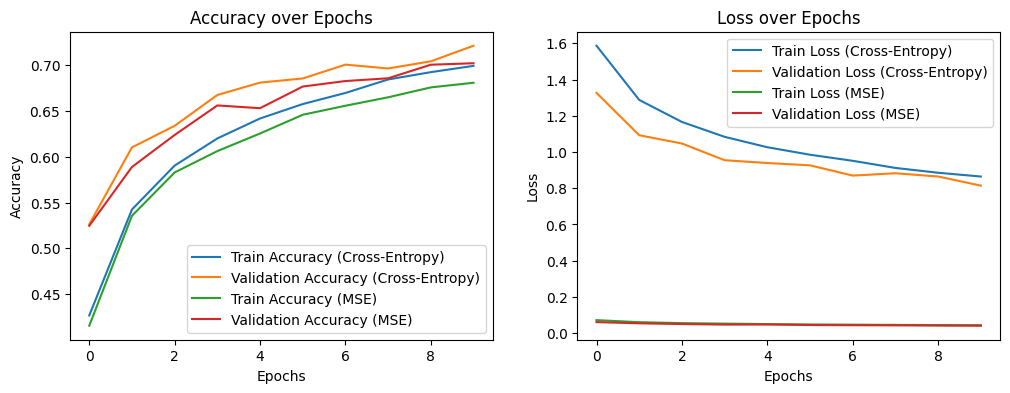

In [ ]:
# Plot training & validation accuracy over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_crossentropy.history['accuracy'], label='Train Accuracy (Cross-Entropy)')
plt.plot(history_crossentropy.history['val_accuracy'], label='Validation Accuracy (Cross-Entropy)')
plt.plot(history_mse.history['accuracy'], label='Train Accuracy (MSE)')
plt.plot(history_mse.history['val_accuracy'], label='Validation Accuracy (MSE)')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history_crossentropy.history['loss'], label='Train Loss (Cross-Entropy)')
plt.plot(history_crossentropy.history['val_loss'], label='Validation Loss (Cross-Entropy)')
plt.plot(history_mse.history['loss'], label='Train Loss (MSE)')
plt.plot(history_mse.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Why is weight initialization important, and how does it impact the convergence of your network?
Weight initialization is important because it helps prevent symmetry, ensures that neurons learn unique features, and avoids problems like vanishing or exploding gradients during training. Properly initialized weights allow the model to start from a position, leading to faster convergence and improved overall performance. Techniques like Xavier/Glorot or He initialization are designed to maintain the scale of gradients across layers, facilitating smoother training and better results. In essence, good weight initialization is crucial for efficient learning in neural networks.


### A brief discussion of the challenges faced
1.Training Time: Training the model on the CIFAR-10 dataset took a significant amount of time.
I utilized data augmentation techniques to improve training efficiency

2.Choosing the Right Hyperparameters: Selecting optimal values for learning rates, batch sizes, and the number of epochs was tricky. I performed experiments with different values and monitored the model's performance to find a suitable combination.


